In [32]:
%matplotlib inline

from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np
import matplotlib.pyplot as plt

In [30]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [12]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

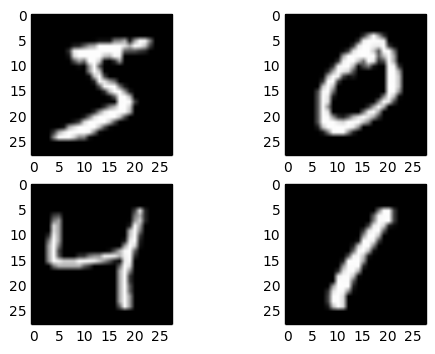

In [13]:
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(x_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(x_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(x_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(x_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [45]:
# initialize parameters
learning_rate = 0.00001
epochs = 10
batch_size = 200
max_train_items = x_train.shape[0]
max_test_items = x_test.shape[0]

X_train = x_train[:max_train_items]
Y_train = y_train[:max_train_items]
X_test = x_test[:max_test_items]
Y_test = y_test[:max_test_items]

In [41]:
# Flatten the input values
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

# Normalize inputs from 0-1
X_train = X_train/255
X_test = X_test/255

In [42]:
# One hot encode output
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)

num_classes = Y_train.shape[1]

In [43]:
# define a simple multilayer perceptron
model = Sequential();
model.add(Dense(300, input_dim=num_pixels));
model.add(Activation('relu'));
model.add(Dense(100));
model.add(Activation('relu'));
model.add(Dense(num_classes));
model.add(Activation('softmax'));

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [44]:
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=epochs, batch_size=batch_size, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, Y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 3s - loss: 0.2995 - acc: 0.9138 - val_loss: 0.1486 - val_acc: 0.9550
Epoch 2/10
 - 3s - loss: 0.1172 - acc: 0.9657 - val_loss: 0.1137 - val_acc: 0.9655
Epoch 3/10
 - 3s - loss: 0.0774 - acc: 0.9770 - val_loss: 0.0811 - val_acc: 0.9747
Epoch 4/10
 - 3s - loss: 0.0550 - acc: 0.9833 - val_loss: 0.0772 - val_acc: 0.9758
Epoch 5/10
 - 3s - loss: 0.0414 - acc: 0.9874 - val_loss: 0.0795 - val_acc: 0.9771
Epoch 6/10
 - 3s - loss: 0.0309 - acc: 0.9903 - val_loss: 0.0674 - val_acc: 0.9781
Epoch 7/10
 - 3s - loss: 0.0240 - acc: 0.9931 - val_loss: 0.0682 - val_acc: 0.9794
Epoch 8/10
 - 3s - loss: 0.0188 - acc: 0.9947 - val_loss: 0.0748 - val_acc: 0.9777
Epoch 9/10
 - 3s - loss: 0.0158 - acc: 0.9952 - val_loss: 0.0739 - val_acc: 0.9792
Epoch 10/10
 - 3s - loss: 0.0110 - acc: 0.9969 - val_loss: 0.0727 - val_acc: 0.9805
Baseline Error: 1.95%
